# Command 패턴

## C.1 소개

* Command 패턴은 Behavioral Design Pattern
* 사용할 객체를 은익한다.
    * "encapsulates a request as an object,
    thereby letting you parameterize other objects with different requests, queue or log requests, and support undoable operations"

* 전등을 켜는 예:
    * light.up() -> command.execute() 사용하는 함수 통일. 전등객체를 직접 호출해서 켜는 것이 아니라, 세부내용을 감추고 사용할 객체 없이 단순히 execute()함수만 호출한다. 
    * 사용자는 light객체가 은익되어 있어, execute() 함수호출. execute()함수를 호출할 때 사용할 객체를 밝히지 않는다. 따라서 전등객체를 사전에 연결해 놓아야 한다.

* 디자인패턴 요소

요소 | 설명
---|---
name | Command
problem | 사용객체의 API가 서로 다름.
solution | 실행과 요청을 분리.
consequence | (작은) 클래스가 많아지지만, 객체사용에 필요한 복잡성을 제거하고 감춤 (함수 명 동일해짐)

* 프로그래밍 예제
    * HFDP Diner, 'Remote Control' (HFDP Ch6)
    * GUI buttons and menu items 
    * Macro recording - lambda
    * 과제
        * case extension
            * Remote Controller - DVD (undo)
        * new case -  Macro

## S.2 문제

* 사용하려는 객체가 많고, API가 서로 다른 경우.
    * 차고문 up()
    * 전등 on()
    * TV pressOn()...
* Remote Control의 경우, 차고, 전등, TV, Stereo, CeilingFan... 사용해야 하는 객체가 많다.

In [3]:
import iplantuml

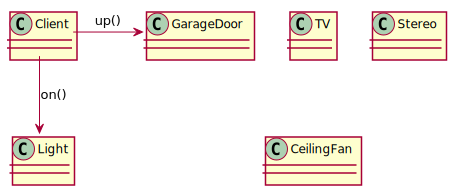

In [4]:
%%plantuml
@startuml
class Client
class TV
class Stereo
class CeilingFan
Client -right-> GarageDoor:up()
Client -down-> Light:on()
@enduml

## S.3 설계

* decoupling - 주문과 실행을 분리

Command Pattern | 설명 | Diner | Remote
---|---|---|---
Client | Command객체 생성 | 고객 | 리모콘 버튼의 기능을 인지하고, 버튼 누름.
Command | 어떤 Receiver를 실행할 지 연결 | 웨이터 | 버튼에 실제사용객체를 연결해 놓음.
Invoker | 주문을 받아서, 실행하기 위해 Command인터페이스 연결 | 주문서 | 리모콘. 버튼을 누르면 기능을 실행함.
Receiver | 실제 명령을 수행 | 요리사 | TV, 전등과 같은 실제객체.

* 역할
    * Command
        * knows about receiver and invokes a method of the receiver.
        * Values for parameters of the receiver method are stored in the command
        * 예: Command, ConcreteCommand
    * Receiver
        * 실제 명령 수행
        * 예: Light, GarageDoor
    * Invoker
        * 주문을 받아서, 주문을 실행하기 위해 Command인터페이스 연결
        * Command인터페이스만 앎. Command가 실제 어떻게 수행되는지 모름
        * 예: RemoteControl
    * Client
        * 무엇을 주문할지 결정하고, 주문Command을 Invoker에게 넘김
        * 예: main함수

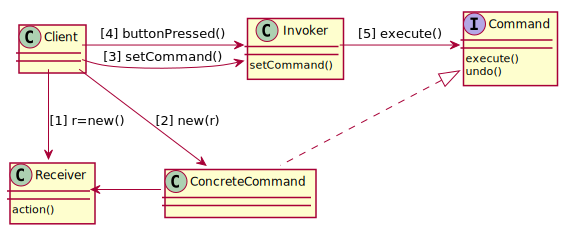

In [7]:
%%plantuml
@startuml
class Client
class Invoker {
    setCommand()
}
Interface Command {
    execute()
    undo()
}
class Receiver {
    action()
}

Client --> Invoker:[3] setCommand()
Client -right-> Invoker:[4] buttonPressed()
Client -down-> Receiver:[1] r=new()
Client --> ConcreteCommand:[2] new(r)
Invoker -right-> Command: [5] execute()
ConcreteCommand -left-> Receiver
Command <|.. ConcreteCommand
@enduml

## S.4 사례

구분 | 설명
-----|-----
simple remote | 버튼 하나
리모콘  | undo, 여러 버튼 (배열), null object
파티 | macro

* 인터페이스 함수에 argument가 없다는 점에 유의한다.
* 사용하려는 객체는 생성자에서 만들어 놓는다.

* 인터페이스를 정의하기

```
public interface Command {
    public void execute();
}
```

* 인터페이스를 구현하기

```
public class LightOnCommand implements Command {
	Light light;
	public LightOnCommand(Light light) {
		this.light = light;
	}
	public void execute() {
		light.on();
	}
}
```

* 인터페이스를 연결하고 실행하기

```
public class SimpleRemoteControl {
	Command slot;
	public SimpleRemoteControl() {}
	public void setCommand(Command command) {
		slot = command;
	}
	public void buttonWasPressed() {
		slot.execute();
	}
}
```

### S.4.1 simpe remote

* 단순 리모콘으로 버튼이 하나만 있는 사례

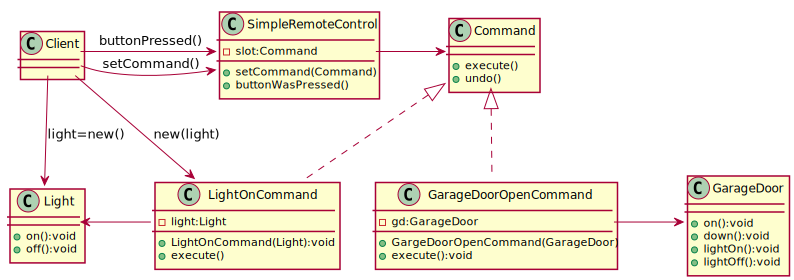

In [13]:
%%plantuml
@startuml
class Command {
  +execute()
  +undo()
}
class LightOnCommand {
  -light:Light
  +LightOnCommand(Light):void
  +execute()
}
class GarageDoorOpenCommand {
  -gd:GarageDoor
  +GargeDoorOpenCommand(GarageDoor)
  +execute():void
}
class Light {
  +on():void
  +off():void
}
class GarageDoor {
  +on():void
  +down():void
  +lightOn():void
  +lightOff():void
}
class SimpleRemoteControl {
  -slot:Command
  +setCommand(Command)
  +buttonWasPressed()
}
Client --> SimpleRemoteControl:setCommand()
Client -right-> SimpleRemoteControl:buttonPressed()
Client -down-> Light:light=new()
Client --> LightOnCommand:new(light)
Command <|.. LightOnCommand
Command <|.. GarageDoorOpenCommand
GarageDoorOpenCommand -right-> GarageDoor
LightOnCommand -left-> Light
SimpleRemoteControl -right-> Command
@enduml

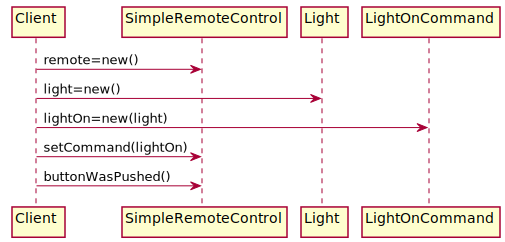

In [8]:
%%plantuml
@startuml
Client -> SimpleRemoteControl:remote=new()
Client -> Light:light=new()
Client -> LightOnCommand: lightOn=new(light)
Client -> SimpleRemoteControl:setCommand(lightOn)
Client -> SimpleRemoteControl:buttonWasPushed()
@enduml

In [ ]:
# %load ./src/headfirst/command/simpleremote/command.java
package headfirst.command.simpleremote;

public interface Command {
    public void execute();
}


In [ ]:
# %load ./src/headfirst/command/simpleremote/GarageDoor.java
package headfirst.command.simpleremote;

public class GarageDoor {
    public GarageDoor() {
    }
    public void up() {
        System.out.println("Garage Door is Open");
    }
    public void down() {
        System.out.println("Garage Door is Closed");
    }
    public void stop() {
        System.out.println("Garage Door is Stopped");
    }
    public void lightOn() {
        System.out.println("Garage light is on");
    }
    public void lightOff() {
        System.out.println("Garage light is off");
    }
}

In [ ]:
# %load ./src/headfirst/command/simpleremote/GarageDoorOpenCommand.java
package headfirst.command.simpleremote;

public class GarageDoorOpenCommand implements Command {
	GarageDoor garageDoor;

	public GarageDoorOpenCommand(GarageDoor garageDoor) {
		this.garageDoor = garageDoor;
	}

	public void execute() {
		garageDoor.up();
	}
}


In [ ]:
# %load ./src/headfirst/command/simpleremote/Light.java
package headfirst.command.simpleremote;

public class Light {

	public Light() {
	}

	public void on() {
		System.out.println("Light is on");
	}

	public void off() {
		System.out.println("Light is off");
	}
}

In [ ]:
# %load ./src/headfirst/command/simpleremote/LightOnCommand.java
package headfirst.command.simpleremote;

public class LightOnCommand implements Command {
	Light light;
  
	public LightOnCommand(Light light) {
		this.light = light;
	}
 
	public void execute() {
		light.on();
	}
}


In [ ]:
# %load ./src/headfirst/command/simpleremote/LightOffCommand.java
package headfirst.command.simpleremote;

public class LightOffCommand implements Command {
	Light light;
 
	public LightOffCommand(Light light) {
		this.light = light;
	}
 
	public void execute() {
		light.off();
	}
}

In [ ]:
# %load ./src/headfirst/command/simpleremote/SimpleRemoteControl.java
package headfirst.command.simpleremote;

import java.util.*;

public class SimpleRemoteControl {
	Command slot;
 
	public SimpleRemoteControl() {}
 
	public void setCommand(Command command) {
		slot = command;
	}
 
	public void buttonWasPressed() {
		slot.execute();
	}
}

In [ ]:
# %load ./src/headfirst/command/simpleremote/RemoteControlTest.java
package headfirst.command.simpleremote;

public class RemoteControlTest {
    public static void main(String[] args) {
        SimpleRemoteControl remote = new SimpleRemoteControl();
        Light light = new Light();
        GarageDoor garageDoor = new GarageDoor();
        LightOnCommand lightOn = new LightOnCommand(light);
        GarageDoorOpenCommand garageOpen = new GarageDoorOpenCommand(garageDoor);
 
        remote.setCommand(lightOn);
        remote.buttonWasPressed();
        remote.setCommand(garageOpen);
        remote.buttonWasPressed();
    }
}


In [17]:
!javac -d classes/ -sourcepath src/ src/headfirst/command/simpleremote/*.java
!java -cp classes/ headfirst.command.simpleremote.RemoteControlTest

Light is on
Garage Door is Open


### S.4.2 undo

* 6.1에 undo()기능 추가
* 버튼이 여러 개, 배열로 구현한다.
* Null Object Pattern
    * NoCommand클래스는 function body가 비어 있다.
    * 단순하게 배열을 초기화하는 기능.

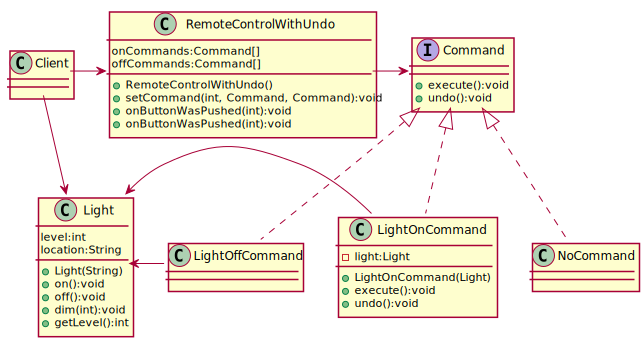

In [8]:
%%plantuml
@startuml
interface Command {
  +execute():void
  +undo():void
}
class LightOnCommand {
  -light:Light
  +LightOnCommand(Light)
  +execute():void
  +undo():void
}
Class LightOffCommand
class Light {
  level:int
  location:String
  +Light(String)
  +on():void
  +off():void
  +dim(int):void
  +getLevel():int
}
class NoCommand
class RemoteControlWithUndo {
  onCommands:Command[]
  offCommands:Command[]
  +RemoteControlWithUndo()
  +setCommand(int, Command, Command):void
  +onButtonWasPushed(int):void
  +onButtonWasPushed(int):void  
}
Command <|.. LightOnCommand
Command <|.. LightOffCommand
Command <|.. NoCommand
LightOnCommand -left-> Light
LightOffCommand -left-> Light
RemoteControlWithUndo -right-> Command
Client -> RemoteControlWithUndo
Client -down-> Light
@enduml

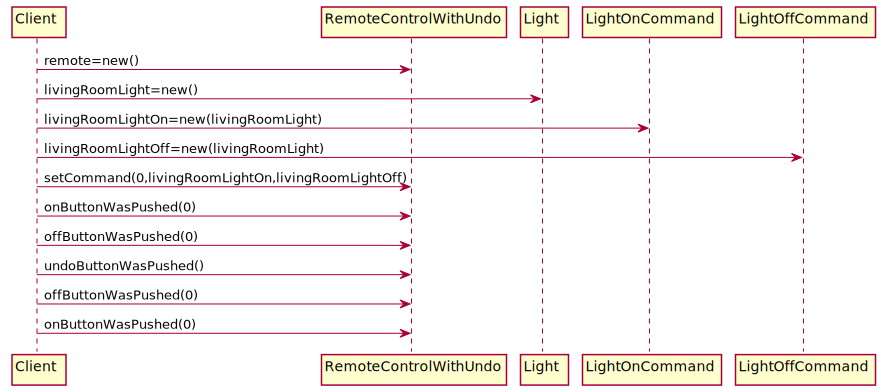

In [10]:
%%plantuml
@startuml
Client -> RemoteControlWithUndo:remote=new()
Client -> Light:livingRoomLight=new()
Client -> LightOnCommand: livingRoomLightOn=new(livingRoomLight)
Client -> LightOffCommand: livingRoomLightOff=new(livingRoomLight)
Client -> RemoteControlWithUndo:setCommand(0,livingRoomLightOn,livingRoomLightOff)
Client -> RemoteControlWithUndo:onButtonWasPushed(0)
Client -> RemoteControlWithUndo:offButtonWasPushed(0)
Client -> RemoteControlWithUndo:undoButtonWasPushed()
Client -> RemoteControlWithUndo:offButtonWasPushed(0)
Client -> RemoteControlWithUndo:onButtonWasPushed(0)
@enduml

In [ ]:
# %load ./src/headfirst/command/undo/Command.java
package headfirst.command.undo;

public interface Command {
    public void execute();
    public void undo();
}


In [ ]:
# %load ./src/headfirst/command/undo/NoCommand.java
package headfirst.command.undo;

public class NoCommand implements Command {
    public void execute() { }
    public void undo() { }
}


In [ ]:
# %load ./src/headfirst/command/undo/Light.java
package headfirst.command.undo;

public class Light {
	String location;
	int level;
	public Light(String location) {
		this.location = location;
	}
	public void on() {
		level = 100;
		System.out.println("Light is on");
	}
	public void off() {
		level = 0;
		System.out.println("Light is off");
	}
	public void dim(int level) {
		this.level = level;
		if (level == 0) {
			off();
		}
		else {
			System.out.println("Light is dimmed to " + level + "%");
		}
	}
	public int getLevel() {
		return level;
	}
}


In [ ]:
# %load ./src/headfirst/command/undo/LightOnCommand.java
package headfirst.command.undo;

public class LightOnCommand implements Command {
	Light light;
	int level;
	public LightOnCommand(Light light) {
		this.light = light;
	}
 
	public void execute() {
        level = light.getLevel();
		light.on();
	}
 
	public void undo() {
		light.dim(level);
	}
}


In [ ]:
# %load ./src/headfirst/command/undo/LightOffCommand.java
package headfirst.command.undo;

public class LightOffCommand implements Command {
	Light light;
	int level;
	public LightOffCommand(Light light) {
		this.light = light;
	}
 
	public void execute() {
        level = light.getLevel();
		light.off();
	}
 
	public void undo() {
		light.dim(level);
	}
}


In [ ]:
# %load ./src/headfirst/command/undo/RemoteControlWithUndo.java
package headfirst.command.undo;

import java.util.*;

public class RemoteControlWithUndo {
	Command[] onCommands;
	Command[] offCommands;
	Command undoCommand;
 
	public RemoteControlWithUndo() {
		onCommands = new Command[7];
		offCommands = new Command[7];
 
		Command noCommand = new NoCommand();
		for(int i=0;i<7;i++) {
			onCommands[i] = noCommand;
			offCommands[i] = noCommand;
		}
		undoCommand = noCommand;
	}
  
	public void setCommand(int slot, Command onCommand, Command offCommand) {
		onCommands[slot] = onCommand;
		offCommands[slot] = offCommand;
	}
 
	public void onButtonWasPushed(int slot) {
		onCommands[slot].execute();
		undoCommand = onCommands[slot];
	}
 
	public void offButtonWasPushed(int slot) {
		offCommands[slot].execute();
		undoCommand = offCommands[slot];
	}
 
	public void undoButtonWasPushed() {
		undoCommand.undo();
	}
  
	public String toString() {
		StringBuffer stringBuff = new StringBuffer();
		stringBuff.append("\n------ Remote Control -------\n");
		for (int i = 0; i < onCommands.length; i++) {
			stringBuff.append("[slot " + i + "] " + onCommands[i].getClass().getName()
				+ "    " + offCommands[i].getClass().getName() + "\n");
		}
		stringBuff.append("[undo] " + undoCommand.getClass().getName() + "\n");
		return stringBuff.toString();
	}
}


In [ ]:
# %load ./src/headfirst/command/undo/RemoteLoader.java
package headfirst.command.undo;

public class RemoteLoader {
 
	public static void main(String[] args) {
		RemoteControlWithUndo remoteControl = new RemoteControlWithUndo();
 
		Light livingRoomLight = new Light("Living Room");

		LightOnCommand livingRoomLightOn = new LightOnCommand(livingRoomLight);
		LightOffCommand livingRoomLightOff = new LightOffCommand(livingRoomLight);

		remoteControl.setCommand(0, livingRoomLightOn, livingRoomLightOff);
 
		remoteControl.onButtonWasPushed(0);
		remoteControl.offButtonWasPushed(0);
		System.out.println(remoteControl);
		remoteControl.undoButtonWasPushed();
		remoteControl.offButtonWasPushed(0);
		remoteControl.onButtonWasPushed(0);
		System.out.println(remoteControl);
		remoteControl.undoButtonWasPushed();
	}
}


In [38]:
!javac -d classes/ -sourcepath src/ src/headfirst/command/undo/*.java
!java -cp classes/ headfirst.command.undo.RemoteLoader

Light is on
Light is off

------ Remote Control -------
[slot 0] headfirst.command.undo.LightOnCommand    headfirst.command.undo.LightOffCommand
[slot 1] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 2] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 3] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 4] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 5] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 6] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[undo] headfirst.command.undo.LightOffCommand

Light is dimmed to 100%
Light is off
Light is on

------ Remote Control -------
[slot 0] headfirst.command.undo.LightOnCommand    headfirst.command.undo.LightOffCommand
[slot 1] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 2] headfirst.command.undo.NoCommand    headfirst.command.undo.NoCommand
[slot 3] headfi

### S.4.3 Party

* 많은 기기
* macro

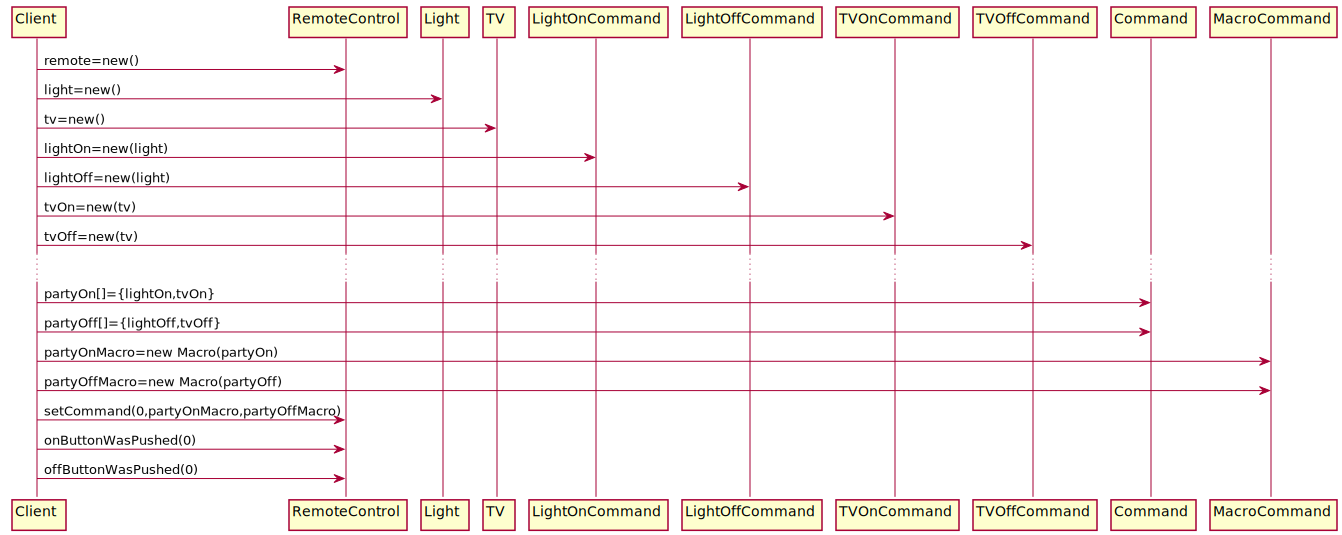

In [94]:
%%plantuml
@startuml
Client -> RemoteControl:remote=new()
Client -> Light:light=new()
Client -> TV:tv=new()
Client -> LightOnCommand:lightOn=new(light)
Client -> LightOffCommand:lightOff=new(light)
Client -> TVOnCommand:tvOn=new(tv)
Client -> TVOffCommand:tvOff=new(tv)
    ...
Client -> Command:partyOn[]={lightOn,tvOn}
Client -> Command:partyOff[]={lightOff,tvOff}
Client -> MacroCommand:partyOnMacro=new Macro(partyOn)
Client -> MacroCommand:partyOffMacro=new Macro(partyOff)
Client -> RemoteControl:setCommand(0,partyOnMacro,partyOffMacro)
Client -> RemoteControl:onButtonWasPushed(0)
Client -> RemoteControl:offButtonWasPushed(0)
@enduml

In [ ]:
# %load ./src/headfirst/command/party/RemoteLoader.java
package headfirst.command.party;

public class RemoteLoader {

	public static void main(String[] args) {

		RemoteControl remoteControl = new RemoteControl();

		Light light = new Light("Living Room");
		TV tv = new TV("Living Room");
		Stereo stereo = new Stereo("Living Room");
		Hottub hottub = new Hottub();
 
		LightOnCommand lightOn = new LightOnCommand(light);
		StereoOnCommand stereoOn = new StereoOnCommand(stereo);
		TVOnCommand tvOn = new TVOnCommand(tv);
		HottubOnCommand hottubOn = new HottubOnCommand(hottub);
		LightOffCommand lightOff = new LightOffCommand(light);
		StereoOffCommand stereoOff = new StereoOffCommand(stereo);
		TVOffCommand tvOff = new TVOffCommand(tv);
		HottubOffCommand hottubOff = new HottubOffCommand(hottub);

		Command[] partyOn = { lightOn, stereoOn, tvOn, hottubOn};
		Command[] partyOff = { lightOff, stereoOff, tvOff, hottubOff};
  
		MacroCommand partyOnMacro = new MacroCommand(partyOn);
		MacroCommand partyOffMacro = new MacroCommand(partyOff);
 
		remoteControl.setCommand(0, partyOnMacro, partyOffMacro);
  
		System.out.println(remoteControl);
		System.out.println("--- Pushing Macro On---");
		remoteControl.onButtonWasPushed(0);
		System.out.println("--- Pushing Macro Off---");
		remoteControl.offButtonWasPushed(0);
	}
}


In [91]:
!javac -d classes/ -sourcepath src/ src/headfirst/command/party/*.java
!java -cp classes/ headfirst.command.party.RemoteLoader


------ Remote Control -------
[slot 0] headfirst.command.party.MacroCommand    headfirst.command.party.MacroCommand
[slot 1] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[slot 2] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[slot 3] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[slot 4] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[slot 5] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[slot 6] headfirst.command.party.NoCommand    headfirst.command.party.NoCommand
[undo] headfirst.command.party.NoCommand

--- Pushing Macro On---
Light is on
Living Room stereo is on
Living Room TV is on
Living Room TV channel is set for DVD
Hottub is heating to a steaming 104 degrees
Hottub is bubbling!
--- Pushing Macro Off---
Light is off
Living Room stereo is off
Living Room TV is off
Hottub is cooling to 98 degrees
